# 막대 그래프 (Bar Chart) 그리는 방법 - pandas, matplotlib, seaborn

시각화할 때 막대 그래프 자주 사용하는데, 검색할 때 마다 방법이 너무 다양하다... 정리해보자.

In [327]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

In [337]:
np.random.seed(seed=1)
group_list = ['A','B','C','D']
n_size = 20
group = [random.choice(group_list) for i in range(n_size)]
xval = np.random.poisson(lam=10,size=n_size)
label = np.random.binomial(n=1, p=0.5, size=n_size)
label = list(map(str, label))
df = pd.DataFrame({'xval':xval, 'group':group, 'label':label})
df.head()

,xval,group,label
0,9,A,0
1,6,B,0
2,7,A,1
3,9,A,0
4,9,D,0


In [338]:
df_by_group = df.groupby(['group'])['xval'].sum()
df_by_group_label = df.groupby(['group','label'])['xval'].sum()

In [339]:
df_by_group

group
A    50
B    27
C    31
D    70
Name: xval, dtype: int32

In [356]:
df_by_group_label 

,group,label,xval
0,A,0,26
1,A,1,24
2,B,0,6
3,B,1,21
4,C,0,12
5,C,1,19
6,D,0,42
7,D,1,28


## 1. pandas

> __DataFrame.plot.bar(self, x=None, y=None, **kwargs)__  
> x: xlabel or position, optional  
> y: ylabel or position, optional  

### 한 개의 그룹이 있을 경우

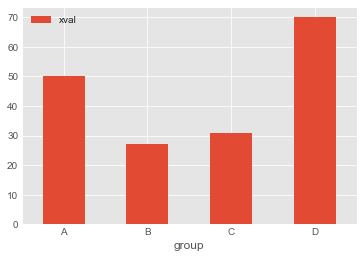

In [340]:
df_by_group = df_by_group.reset_index()
df_by_group.plot.bar(x='group',y='xval',rot=0)

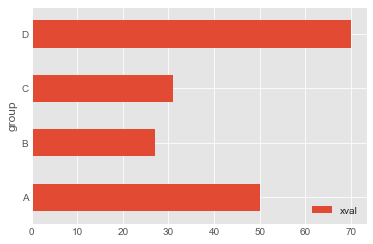

In [341]:
df_by_group.plot.barh(x='group',y='xval',rot=0)

### 두 개의 그룹이 있을 경우
- 그룹화된 요약 테이블을 피봇테이블로 만든다

In [342]:
df_by_group_label = df_by_group_label.reset_index()
df_pivot = df_by_group_label.pivot(index='group',columns='label',values='xval')
df_pivot

label,0,1
group,,
A,26,24
B,6,21
C,12,19
D,42,28


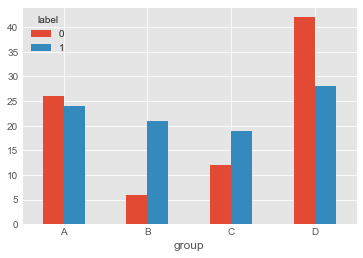

In [343]:
df_pivot.plot.bar(rot=0)

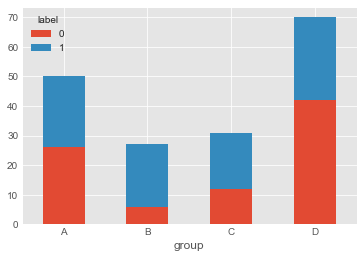

In [344]:
df_pivot.plot.bar(stacked=True, rot=0)

## 2. matplotlib

> __matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)__  
> x : sequence of scalars  
> height : scalar or sequence of scalars  
> width : scalar or array-like, optional  
> bottom : scalar or array-like, optional  

### 한 개의 그룹이 있을 경우

In [357]:
df_by_group = df.groupby(['group'])['xval'].sum()
df_by_group

group
A    50
B    27
C    31
D    70
Name: xval, dtype: int32

([<matplotlib.axis.XTick at 0x174ffa65b70>,
 <a list of 4 Text xticklabel objects>)

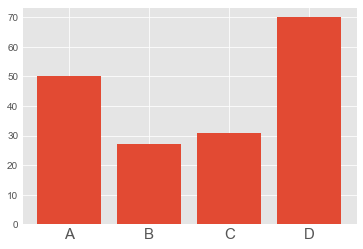

In [358]:
label = df_by_group.index
index = np.arange(len(label)) # 0,1,2,3
plt.bar(index, df_by_group) 
plt.xticks(index, label, fontsize=15) # label 이름 넣기

([<matplotlib.axis.YTick at 0x174fe7f0860>,
 <a list of 4 Text yticklabel objects>)

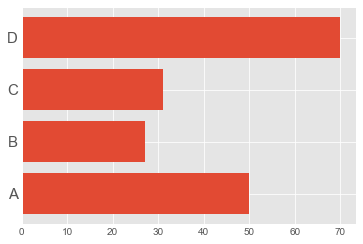

In [359]:
plt.barh(index, df_by_group) 
plt.yticks(index, label, fontsize=15) 

### 두 개의 그룹이 있을 경우
- plt.bar의 'bottom' 또는 'width' 옵션 을 활용하자
- 2번째층 그룹의 라벨에 따라 데이터프레임을 따로 정의해야한다

In [360]:
df_by_group_by0 = df[df['label']=='0'].groupby(['group'])['xval'].sum()
df_by_group_by1 = df[df['label']=='1'].groupby(['group'])['xval'].sum()

In [361]:
label = df.group.unique()
label = sorted(label)
index = np.arange(len(label)) 

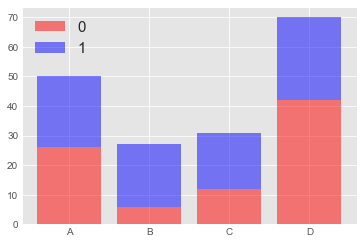

In [363]:
p1 = plt.bar(index,df_by_group_by0, color='red', alpha=0.5)
p2 = plt.bar(index,df_by_group_by1, color='blue', alpha=0.5,
             bottom=df_by_group_by0)
plt.xticks(index,label)
plt.legend((p1[0], p2[0]), ('0', '1'), fontsize=15)

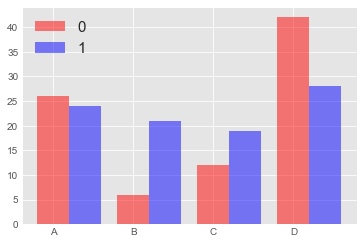

In [352]:
p1 = plt.bar(index,df_by_group_by0, color='red', alpha=0.5,
             width=0.4)
p2 = plt.bar(index+0.4,df_by_group_by1, color='blue', alpha=0.5,
             width=0.4)
plt.xticks(index,label)
plt.legend((p1[0], p2[0]), ('0', '1'), fontsize=15)

* 문자열 리스트 정렬하기
[참조](https://hashcode.co.kr/questions/1058/%EB%A6%AC%EC%8A%A4%ED%8A%B8%EB%A5%BC-%EC%82%AC%EC%A0%84%EC%88%9C%EC%9C%BC%EB%A1%9C-%EC%A0%95%EB%A0%AC%ED%95%98%EB%A0%A4%EA%B3%A0-%ED%95%A9%EB%8B%88%EB%8B%A4)

In [306]:
import locale
import functools

mylist = ["사과", "바나나", "딸기", "포도"]

locale.setlocale(locale.LC_ALL, '') #한국 기준으로 set
sortedByLocale = sorted(mylist, key=functools.cmp_to_key(locale.strcoll))

In [307]:
sortedByLocale

['딸기', '바나나', '사과', '포도']

## 3. seaborn

> __seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x10a2a03b0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)__  
> x, y, hue: x, y, huenames of variables in data or vector data, optional  
> data: dataDataFrame, array, or list of arrays, optional  
> dodge: dodgebool, optional  (When hue nesting is used, whether elements should be shifted along the categorical axis.)

### 한 개의 그룹이 있을 경우

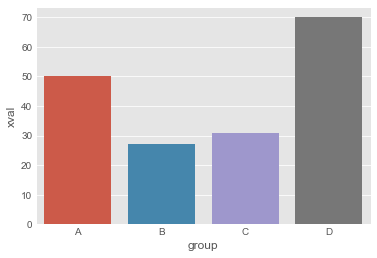

In [370]:
df_by_group = df.groupby(['group'])['xval'].sum().reset_index()
sns.barplot(x='group', y='xval', data=df_by_group)

### 두 개의 그룹이 있을 경우

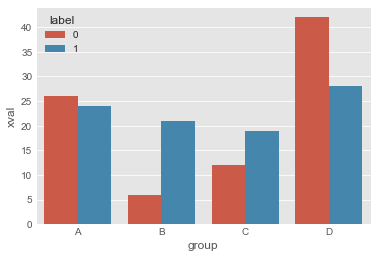

In [365]:
df_by_group_label = df.groupby(['group','label'])['xval'].sum().reset_index()
sns.barplot(x='group', y='xval', hue='label',data=df_by_group_label )

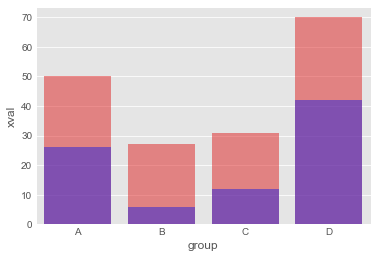

In [375]:
df_by_group_by0 = df[df['label']=='0'].groupby(['group'])['xval'].sum().reset_index()
df_by_group_by1 = df[df['label']=='1'].groupby(['group'])['xval'].sum().reset_index()

sns.barplot(x='group', y='xval', data=df_by_group,color="red",alpha=0.5)
sns.barplot(x='group', y='xval', data=df_by_group_by0 ,color="blue",alpha=0.5)

## 4. 파이썬에서 R의 'ggplot2' 사용하기

In [317]:
%matplotlib inline
import plotnine as p9

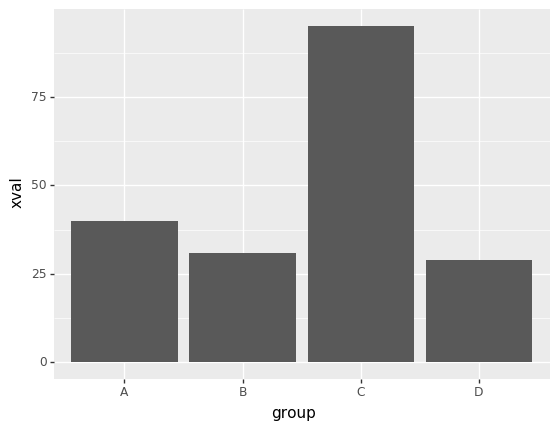

<ggplot: (-9223371936731132493)>

In [320]:
p9.ggplot(data=df,mapping=p9.aes(x='group',y='xval'))+p9.geom_bar(stat='identity')

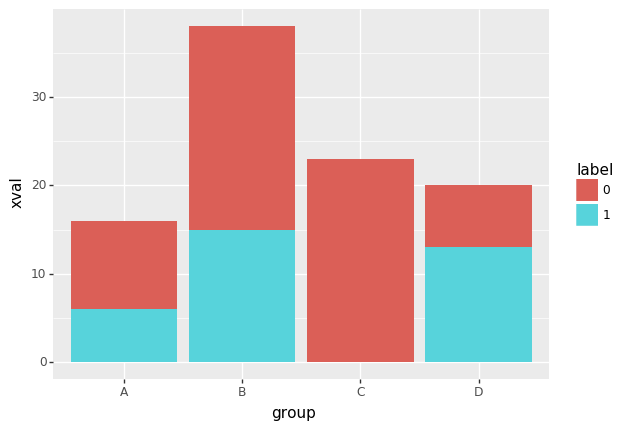

<ggplot: (100125509489)>

In [240]:
p9.ggplot(data=df,mapping=p9.aes(x='group',y='xval',fill='label'))+p9.geom_bar(stat='identity')

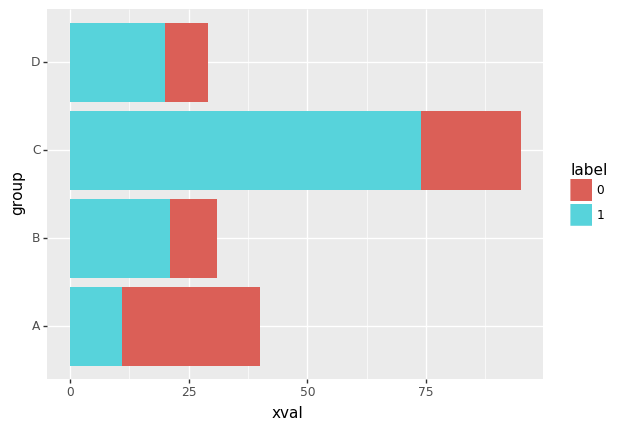

<ggplot: (100123695585)>

In [319]:
p9.ggplot(data=df,mapping=p9.aes(x='group',y='xval',fill='label'))+p9.geom_bar(stat='identity')+p9.coord_flip()

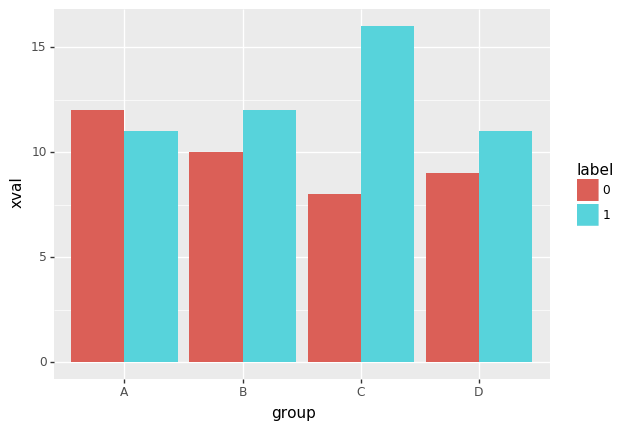

<ggplot: (100124825846)>

In [323]:
p9.ggplot(data=df,mapping=p9.aes(x='group',y='xval',fill='label'))+p9.geom_bar(stat='identity',position='dodge')